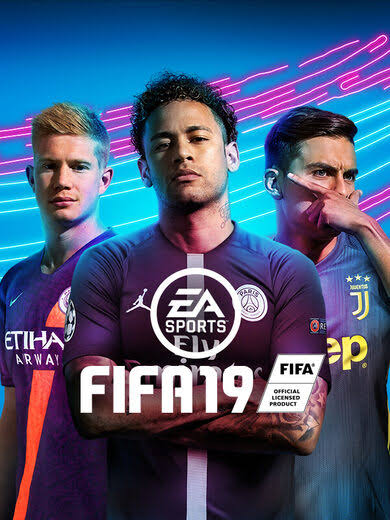

In [179]:
im1 = Image.open(r"C:\Users\seyi\Desktop\images (2).jpeg")
im1

<br><br><right><h1 style="font-size:4em;color:#2467C0">FIFA 19 DATA ANALYSIS, VISUALIZATION AND PREDICTION</h1></right>
<br>
<table>
<col width="550">
<col width="450">
<tr>
   

- Author - Oyelade David Oluwapelumi
- Country - Nigeria
- Date - 20/08/2020

### Steps carried out in this Data Science Project
1.	Problem Definition
2.	Data Gathering
3.	Data Preparation for Consumption
4.	Exploratory Data Analysis using the Pandas Library
5.	Data Visualization using Matplotlib and Seaborn
6.	Modelling and Evaluation using the Clustering Algorithm and Linear Regression



## Step 1: Problem Definition
For this project, we would do an end to end walkthrough process of analysing, visualizing and predicting a dataset called the FIFA 19 Game Dataset. The simple analytical process will include some steps for exploring, cleaning our dataset and visualizing, some steps for predicting player performance using basic statistics, and some steps for grouping similar clusters using machine learning.


## Step 2: Data Gathering 
The dataset was given to us at the Kaggle website.

## Step 3: Data Preparation for Consumption
### Import Libraries

In [173]:
# EDA PKGS
import pandas as pd
import numpy as np

# VIZ PKGS
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
import seaborn as sns
plt.style.use('fivethirtyeight')

# IMG VIEWER
from os import path
from PIL import Image

# ML PKGS
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# MATHS PKGS
from math import sqrt

### The Dataset
Data Description
The dataset contains information about player in the Fifa 2019 Game.
1. ID - Number
2. Name - The name of the players
3. Age - The age of the players
4. Photo - The picture of the players 
5. Nationality - The nationality of the players
6. Flag - The flags of the nationalities 
7. Overall - The overall rating of the players
8. Club - The club to which the players belong to.
Others not mentioned can be easily understood.

In [2]:
# Load the dataset
data = pd.read_csv(r"C:\Users\seyi\Desktop\MY DATA SCIENCE WORKS, TUTORIAL AND JOURNEY\MY DATASETS USED\data.csv\data.csv")

In [3]:
# Read the dataset
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## Step 4: Exploratory Data Analysis using the Pandas Library

In [4]:
# Defining a variable called country to display the players according to nationality (Nigeria)
def country(x):
    return data[data['Nationality'] == x][['Name','Overall','Potential','Position','Value']]
country('Nigeria')

,Name,Overall,Potential,Position,Value
425,W. Ndidi,80,85,LDM,€17M
789,A. Iwobi,78,84,LM,€14M
858,V. Moses,78,78,RW,€11M
1022,O. Ighalo,77,77,ST,€9M
1296,H. Onyekuru,76,86,ST,€12.5M
...,...,...,...,...,...
17096,J. Kayode,55,70,ST,€180K
17160,H. Offia,55,66,LM,€140K
17261,R. Ayagwa,55,67,CM,€160K
17652,A. Yusuf,53,69,CM,€120K


In [5]:
# Showing players from France
country('France')

,Name,Overall,Potential,Position,Value
14,N. Kanté,89,90,LDM,€63M
17,A. Griezmann,89,90,CAM,€78M
25,K. Mbappé,88,95,RM,€81M
37,H. Lloris,88,88,GK,€36M
42,S. Umtiti,87,92,CB,€57M
...,...,...,...,...,...
17688,J. Anziani,53,66,CM,€110K
17717,D. Makoma,53,64,CM,€100K
17895,K. Ramè,51,65,CDM,€70K
17917,I. Umbdenstock,51,63,CDM,€60K


In [6]:
# Defining a variable called club and showing players according to their clubs (FC Barcelona)
def club(x):
    return data[data['Club'] == x][['Name','Overall','Potential','Position','Nationality','Wage','Value']]

club('FC Barcelona')

,Name,Overall,Potential,Position,Nationality,Wage,Value
0,L. Messi,94,94,RF,Argentina,€565K,€110.5M
7,L. Suárez,91,91,RS,Uruguay,€455K,€80M
18,M. ter Stegen,89,92,GK,Germany,€240K,€58M
20,Sergio Busquets,89,89,CDM,Spain,€315K,€51.5M
32,Coutinho,88,89,LW,Brazil,€340K,€69.5M
42,S. Umtiti,87,92,CB,France,€205K,€57M
49,Jordi Alba,87,87,LB,Spain,€250K,€38M
53,I. Rakitić,87,87,RCM,Croatia,€260K,€46.5M
54,Piqué,87,87,RCB,Spain,€240K,€34M
96,A. Vidal,85,85,CAM,Chile,€205K,€26M


In [7]:
x = club('FC Barcelona')
x.shape

(33, 7)

In [8]:
x.head()

,Name,Overall,Potential,Position,Nationality,Wage,Value
0,L. Messi,94,94,RF,Argentina,€565K,€110.5M
7,L. Suárez,91,91,RS,Uruguay,€455K,€80M
18,M. ter Stegen,89,92,GK,Germany,€240K,€58M
20,Sergio Busquets,89,89,CDM,Spain,€315K,€51.5M
32,Coutinho,88,89,LW,Brazil,€340K,€69.5M


In [9]:
# Let's look at what the data columns are using a pandas attribute called 'columns'
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [14]:
# Renaming the column Clubs_Logo
data.rename(columns={'Club Logo' : 'Clubs_Logo'}, inplace = True)

In [15]:
# Creating a dataframe that can shrink the large dataset 
def defending(data):
    return int(round((data[['Marking', 'StandingTackle', 
                               'SlidingTackle']].mean()).mean()))

def general(data):
    return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve', 
                               'BallControl']].mean()).mean()))

def mental(data):
    return int(round((data[['Aggression', 'Interceptions', 'Positioning', 
                               'Vision','Composure']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing', 'ShortPassing', 
                               'LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration', 'SprintSpeed', 
                               'Agility','Reactions']].mean()).mean()))
def power(data):
    return int(round((data[['Balance', 'Jumping', 'Stamina', 
                               'Strength']].mean()).mean()))

def rating(data):
    return int(round((data[['Potential', 'Overall']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties']].mean()).mean()))

In [16]:
data['Defending'] = data.apply(defending, axis = 1)
data['General'] = data.apply(general, axis = 1)
data['Mental'] = data.apply(mental, axis = 1)
data['Passing'] = data.apply(passing, axis = 1)
data['Mobility'] = data.apply(mobility, axis = 1)
data['Power'] = data.apply(power, axis = 1)
data['Rating'] = data.apply(rating, axis = 1)
data['Shooting'] = data.apply(shooting, axis = 1)

### Data Cleaning

In [10]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18207.0,9103.000000,5256.052511,0.0,4551.5,9103.0,13654.5,18206.0
ID,18207.0,214298.338606,29965.244204,16.0,200315.5,221759.0,236529.5,246620.0
Age,18207.0,25.122206,4.669943,16.0,21.0,25.0,28.0,45.0
Overall,18207.0,66.238699,6.908930,46.0,62.0,66.0,71.0,94.0
Potential,18207.0,71.307299,6.136496,48.0,67.0,71.0,75.0,95.0
Special,18207.0,1597.809908,272.586016,731.0,1457.0,1635.0,1787.0,2346.0
International Reputation,18159.0,1.113222,0.394031,1.0,1.0,1.0,1.0,5.0
Weak Foot,18159.0,2.947299,0.660456,1.0,3.0,3.0,3.0,5.0
Skill Moves,18159.0,2.361308,0.756164,1.0,2.0,2.0,3.0,5.0
Jersey Number,18147.0,19.546096,15.947765,1.0,8.0,17.0,26.0,99.0


After performing a simple descriptive statistics of the data, I discovered that the counts wasn't talling, that means we have null values.

In [12]:
# Filling the null values with 0
data.fillna(0, inplace = True)

In [11]:
data['ShortPassing'].fillna(data['ShortPassing'].mean(), inplace = True)
data['Volleys'].fillna(data['Volleys'].mean(), inplace = True)
data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True)
data['Curve'].fillna(data['Curve'].mean(), inplace = True)
data['FKAccuracy'].fillna(data['FKAccuracy'], inplace = True)
data['LongPassing'].fillna(data['LongPassing'].mean(), inplace = True)
data['BallControl'].fillna(data['BallControl'].mean(), inplace = True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace = True)
data['Finishing'].fillna(data['Finishing'].mean(), inplace = True)
data['Crossing'].fillna(data['Crossing'].mean(), inplace = True)
data['Weight'].fillna('200lbs', inplace = True)
data['Contract Valid Until'].fillna(2019, inplace = True)
data['Height'].fillna("5'11", inplace = True)
data['Loaned From'].fillna('None', inplace = True)
data['Joined'].fillna('Jul 1, 2018', inplace = True)
data['Jersey Number'].fillna(8, inplace = True)
data['Body Type'].fillna('Normal', inplace = True)
data['Position'].fillna('ST', inplace = True)
data['Club'].fillna('No Club', inplace = True)
data['Work Rate'].fillna('Medium/ Medium', inplace = True)
data['Skill Moves'].fillna(data['Skill Moves'].median(), inplace = True)
data['Weak Foot'].fillna(3, inplace = True)
data['Preferred Foot'].fillna('Right', inplace = True)
data['International Reputation'].fillna(1, inplace = True)
data['Wage'].fillna('€200K', inplace = True)

In [13]:
# Cross checking the data for null/na values
data.isnull().sum()

Unnamed: 0        0
ID                0
Name              0
Age               0
Photo             0
                 ..
GKHandling        0
GKKicking         0
GKPositioning     0
GKReflexes        0
Release Clause    0
Length: 89, dtype: int64

In [17]:
players = data[['Name','Defending','General','Mental','Passing',
                'Mobility','Power','Rating','Shooting','Flag','Age',
                'Nationality', 'Photo', 'Clubs_Logo', 'Club']]

players.head()

,Name,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting,Flag,Age,Nationality,Photo,Clubs_Logo,Club
0,L. Messi,29,89,71,87,91,74,94,88,https://cdn.sofifa.org/flags/52.png,31,Argentina,https://cdn.sofifa.org/players/4/19/158023.png,https://cdn.sofifa.org/teams/2/light/241.png,FC Barcelona
1,Cristiano Ronaldo,27,88,73,81,91,83,94,88,https://cdn.sofifa.org/flags/38.png,33,Portugal,https://cdn.sofifa.org/players/4/19/20801.png,https://cdn.sofifa.org/teams/2/light/45.png,Juventus
2,Neymar Jr,28,85,72,80,94,69,92,84,https://cdn.sofifa.org/flags/54.png,26,Brazil,https://cdn.sofifa.org/players/4/19/190871.png,https://cdn.sofifa.org/teams/2/light/73.png,Paris Saint-Germain
3,De Gea,16,26,43,39,66,54,92,21,https://cdn.sofifa.org/flags/45.png,27,Spain,https://cdn.sofifa.org/players/4/19/193080.png,https://cdn.sofifa.org/teams/2/light/11.png,Manchester United
4,K. De Bruyne,59,79,81,92,81,76,92,85,https://cdn.sofifa.org/flags/7.png,27,Belgium,https://cdn.sofifa.org/players/4/19/192985.png,https://cdn.sofifa.org/teams/2/light/10.png,Manchester City


In [18]:
players.columns

Index(['Name', 'Defending', 'General', 'Mental', 'Passing', 'Mobility',
       'Power', 'Rating', 'Shooting', 'Flag', 'Age', 'Nationality', 'Photo',
       'Clubs_Logo', 'Club'],
      dtype='object')

In [19]:
# Showing the best rating in Defending
Best_def = players[['Defending']]
Best_def.head(5)

,Defending
0,29
1,27
2,28
3,16
4,59


In [20]:
print('The best Defender in Fifa 2019 Game has:', Best_def.max())

The best Defender in Fifa 2019 Game has: Defending    92
dtype: int64


In [21]:
# Showing the best rating in Generality
Best_gen = players[['General']]
Best_gen.head(5)

,General
0,89
1,88
2,85
3,26
4,79


In [22]:
print('The best General rated player in Fifa 2019 Game has:', Best_gen.max())

The best General rated player in Fifa 2019 Game has: General    89
dtype: int64


In [23]:
# Showing the best rating in Mentality
Best_men = players[['Mental']]
Best_men.head(5)

,Mental
0,71
1,73
2,72
3,43
4,81


In [24]:
print('The player with great Mental ability in Fifa 2019 Game has:', Best_gen.max())

The player with great Mental ability in Fifa 2019 Game has: General    89
dtype: int64


In [25]:
# Showing the best rating in Passing
Best_pass = players[['Passing']]
Best_pass.head(5)

,Passing
0,87
1,81
2,80
3,39
4,92


In [26]:
print('The player with the best Passing skill in Fifa 2019 Game has:', Best_pass.max())

The player with the best Passing skill in Fifa 2019 Game has: Passing    92
dtype: int64


In [27]:
# # Showing the best rating in Mobility
Best_mob = players[['Mobility']]
Best_mob.head(5)

,Mobility
0,91
1,91
2,94
3,66
4,81


In [28]:
print('The player with good Mobility in Fifa 2019 Game has:', Best_mob.max())

The player with good Mobility in Fifa 2019 Game has: Mobility    94
dtype: int64


In [29]:
# Showing the best rating in Power
Best_pow = players[['Power']]
Best_pow.head(5)

,Power
0,74
1,83
2,69
3,54
4,76


In [30]:
print('The player with the highest Power rating in Fifa 2019 Game:', Best_pow.max())

The player with the highest Power rating in Fifa 2019 Game: Power    87
dtype: int64


In [31]:
# Showing the best Overall Rating 
Best_rat = players[['Rating']]
Best_rat.head(5)

,Rating
0,94
1,94
2,92
3,92
4,92


In [32]:
print('Best Rated player in Fifa 2019 Game has:', Best_rat.max())

Best Rated player in Fifa 2019 Game has: Rating    94
dtype: int64


In [33]:
# Showing the best rating in Shooting
Best_shoot = players[['Shooting']]
Best_shoot.head(5)

,Shooting
0,88
1,88
2,84
3,21
4,85


In [34]:
print('Best Shooter in Fifa 2019 Game has:', Best_shoot.max())

Best Shooter in Fifa 2019 Game has: Shooting    88
dtype: int64


In [35]:
# Showing the best rated player (Messi)
def playerdata(x):
    return players.loc[x,:]

x = playerdata(0)  
pd.set_option('display.max_rows', 20)
x = pd.DataFrame(x)
print(x)

                                                          0
Name                                               L. Messi
Defending                                                29
General                                                  89
Mental                                                   71
Passing                                                  87
Mobility                                                 91
Power                                                    74
Rating                                                   94
Shooting                                                 88
Flag                    https://cdn.sofifa.org/flags/52.png
Age                                                      31
Nationality                                       Argentina
Photo        https://cdn.sofifa.org/players/4/19/158023.png
Clubs_Logo     https://cdn.sofifa.org/teams/2/light/241.png
Club                                           FC Barcelona


## Step 5: Data Visualization using Matplotlib and Seaborn

In [86]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Clubs_Logo', 'Value', 'Wage',
       'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'Sliding

### Best rated players in Fifa 19

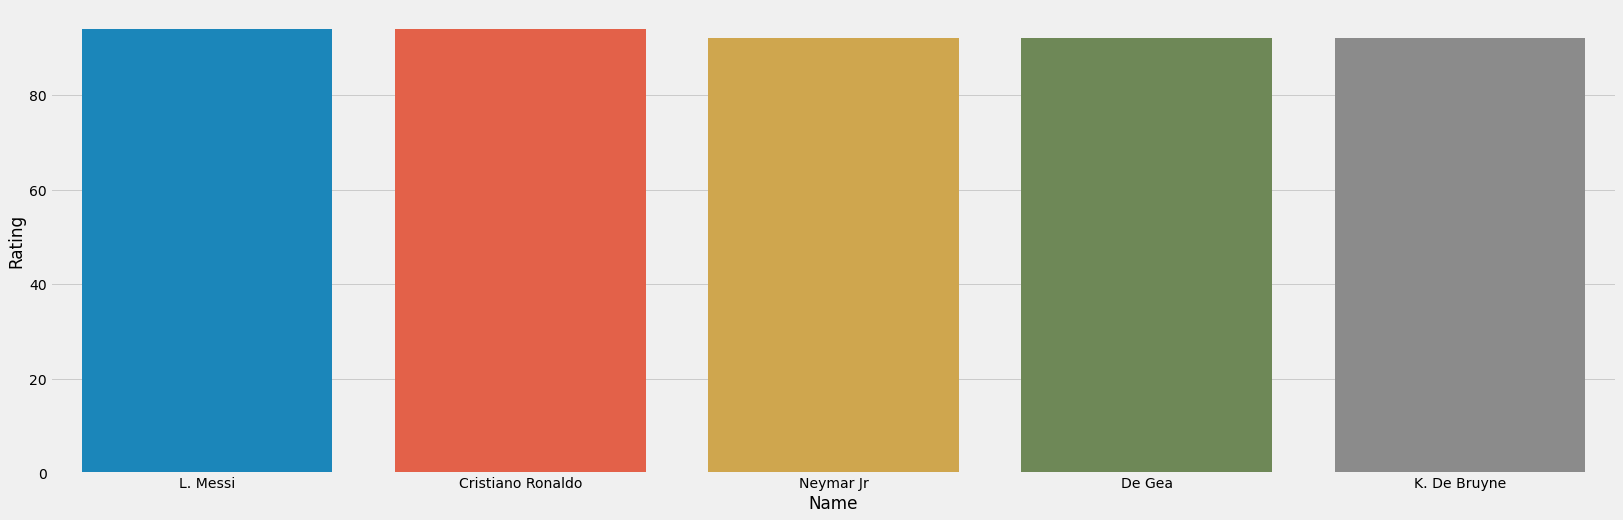

In [36]:
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='Name', y='Rating',ax=ax, data=players.head(5))

This shows that Messi has the highest rating of 94 in the Fifa 2019 Game while Ronaldo is the 2nd rated player with 94

### Best Young Players in Fifa 19 with their Rating

In [121]:
df_yg = data[data['Age']<24]
df_young = df_yg.sort_values(by='Overall', ascending=False).head(5)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

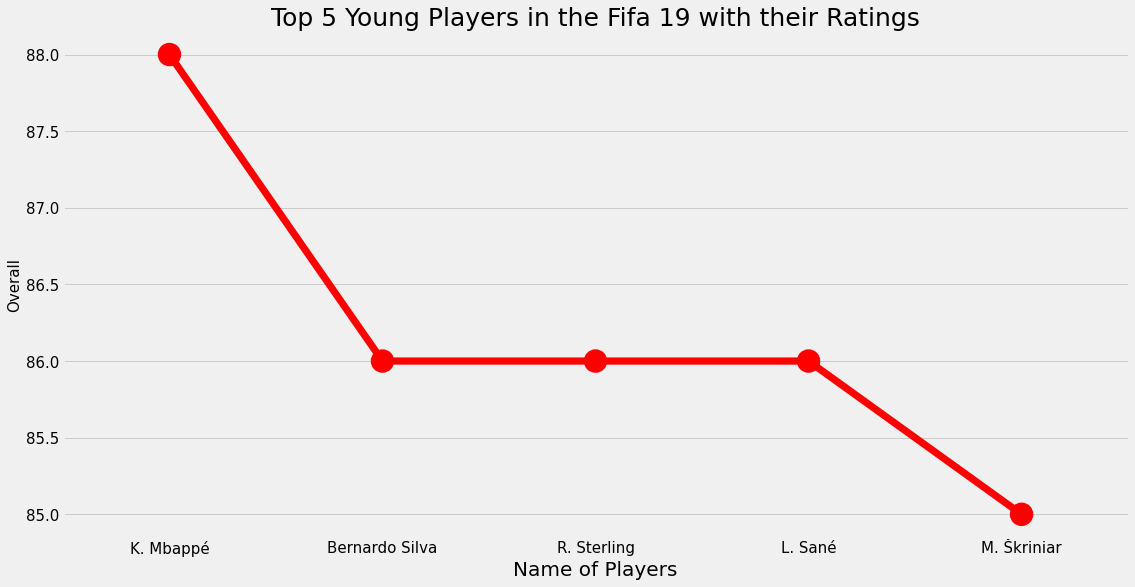

In [180]:
sns.catplot('Name', 'Overall', data = df_young, kind = 'point', height = 8, aspect = 2, color='red')
plt.xlabel('Name of Players', size = 20)
plt.yticks(size=15)
plt.title('Top 5 Young Players in the Fifa 19 Game with their Ratings', size=25)
plt.ylabel('Overall', size=15)
plt.xticks(size=15)

Looking at the above output, K.Mbappe is the Best Young Player in the Fifa 19 game with 88 overall rating.

### Best Goalkeepers in the Fifa 19 Game with their Ratings

In [104]:
df_gkp = data[data['Position']=='GK']
df_goalkp = df_gkp.sort_values(by='Overall', ascending=False).head(5)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

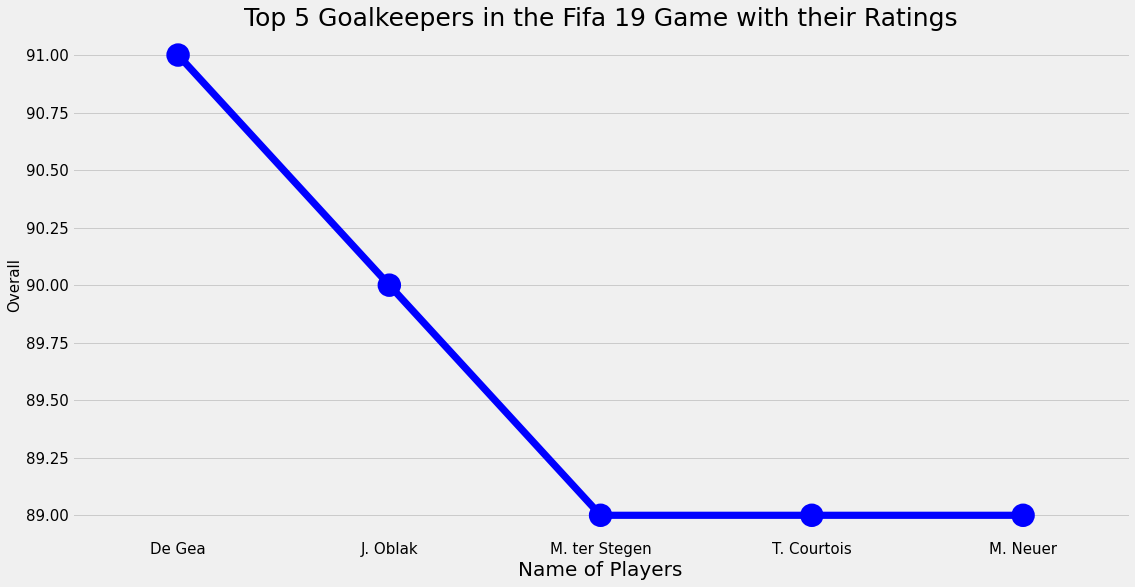

In [181]:
sns.catplot('Name', 'Overall', data = df_goalkp, kind = 'point', height = 8, aspect = 2, color='blue')
plt.xlabel('Name of Players', size = 20)
plt.yticks(size=15)
plt.title('Top 5 Goalkeepers in the Fifa 19 Game with their Ratings', size=25)
plt.ylabel('Overall', size=15)
plt.xticks(size=15)

Looking at the output, De Gea is regarded as the best goalkeeper in the Fifa 19 Game with a point of 91

### Fatest Players in the Fifa 19 Game with their Ratings

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

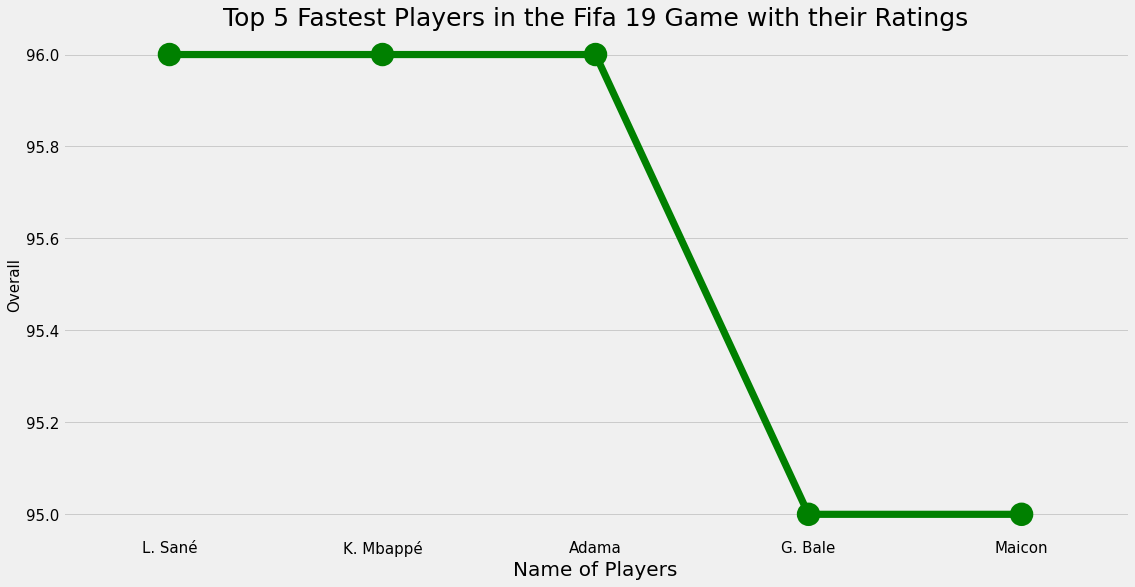

In [182]:
df_fast = data.sort_values(by='SprintSpeed', ascending=False).head(5)
sns.catplot('Name', 'SprintSpeed', data = df_fast, kind = 'point', height = 8, aspect = 2, color='green')
plt.xlabel('Name of Players', size = 20)
plt.yticks(size=15)
plt.title('Top 5 Fastest Players in the Fifa 19 Game with their Ratings', size=25)
plt.ylabel('Overall', size=15)
plt.xticks(size=15)

Wow! Incase if you are playing with Man city, you have the Fastest player in your squad.

### Best Freekick Specialist in the Fifa 19 Game with their Ratings

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

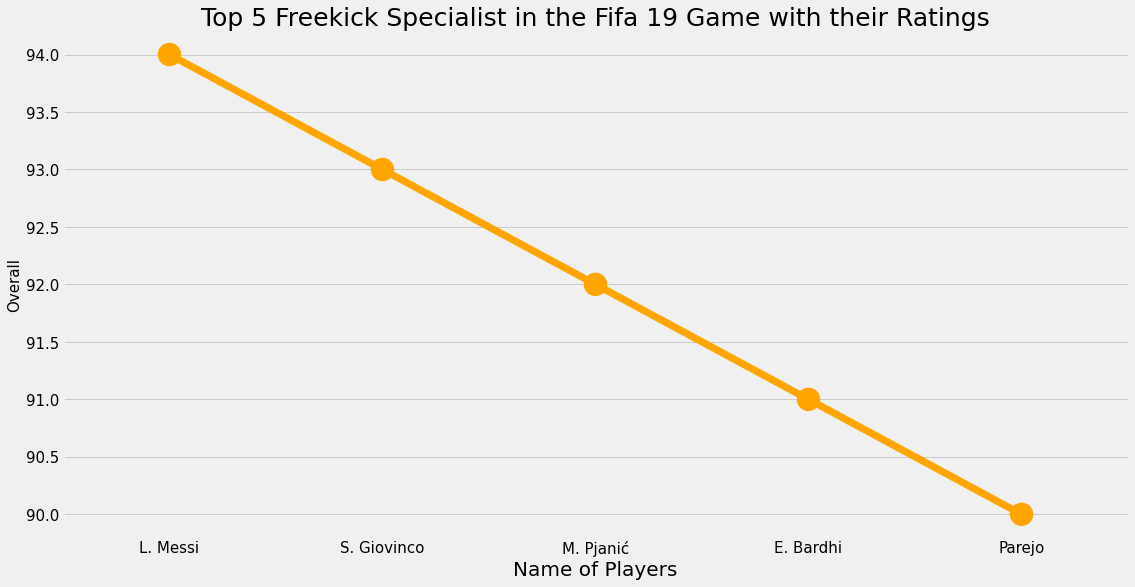

In [183]:
df_fka = data.sort_values(by='FKAccuracy', ascending=False).head(5)
sns.catplot('Name', 'FKAccuracy', data = df_fka, kind = 'point', height = 8, aspect = 2, color='orange')
plt.xlabel('Name of Players', size = 20)
plt.yticks(size=15)
plt.title('Top 5 Freekick Specialist in the Fifa 19 Game with their Ratings', size=25)
plt.ylabel('Overall', size=15)
plt.xticks(size=15)

As we all know how Messi's freekicks are, it's not a suprise he's topping also in the game with a point of 94.

### Best Finishers in the Fifa 19 Game with their Ratings

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

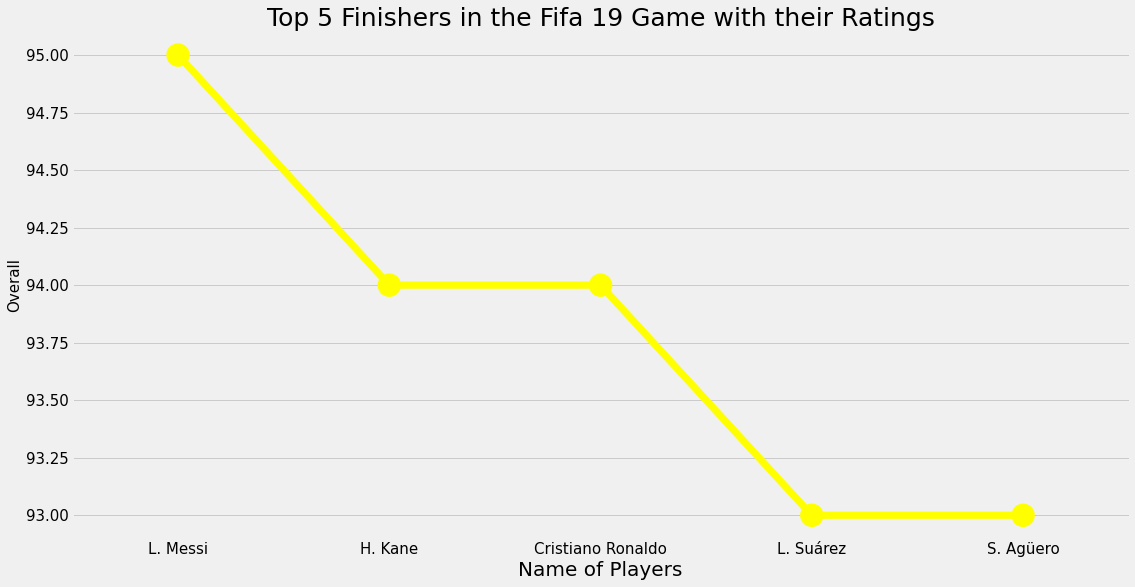

In [184]:
df_fka = data.sort_values(by='Finishing', ascending=False).head(5)
sns.catplot('Name', 'Finishing', data = df_fka, kind = 'point', height = 8, aspect = 2, color='yellow')
plt.xlabel('Name of Players', size = 20)
plt.yticks(size=15)
plt.title('Top 5 Finishers in the Fifa 19 Game with their Ratings', size=25)
plt.ylabel('Overall', size=15)
plt.xticks(size=15)

The King of Football is back again with a Finishing score of 95 in the fifa 19 game.

### Best Defenders in the Fifa 19 Game with their Ratings

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

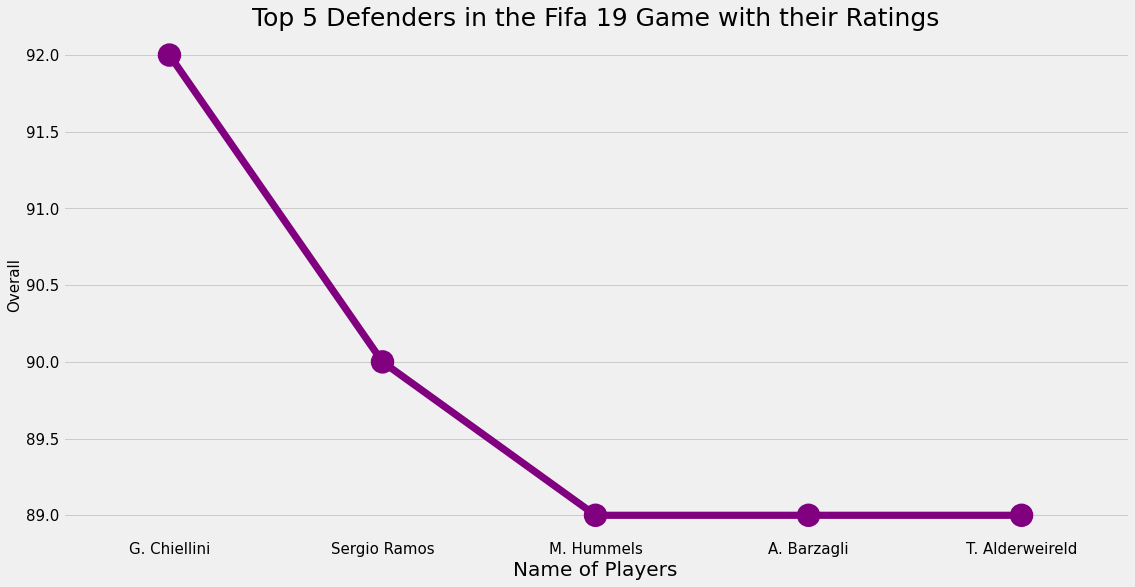

In [185]:
df_fka = data.sort_values(by='Defending', ascending=False).head(5)
sns.catplot('Name', 'Defending', data = df_fka, kind = 'point', height = 8, aspect = 2, color='purple')
plt.xlabel('Name of Players', size = 20)
plt.yticks(size=15)
plt.title('Top 5 Defenders in the Fifa 19 Game with their Ratings', size=25)
plt.ylabel('Overall', size=15)
plt.xticks(size=15)

Looking at the output, it shows that G.Chiellini has the highest point in defending with 92 rating

### Best Dribblers in the Fifa 19 Game with their Ratings

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

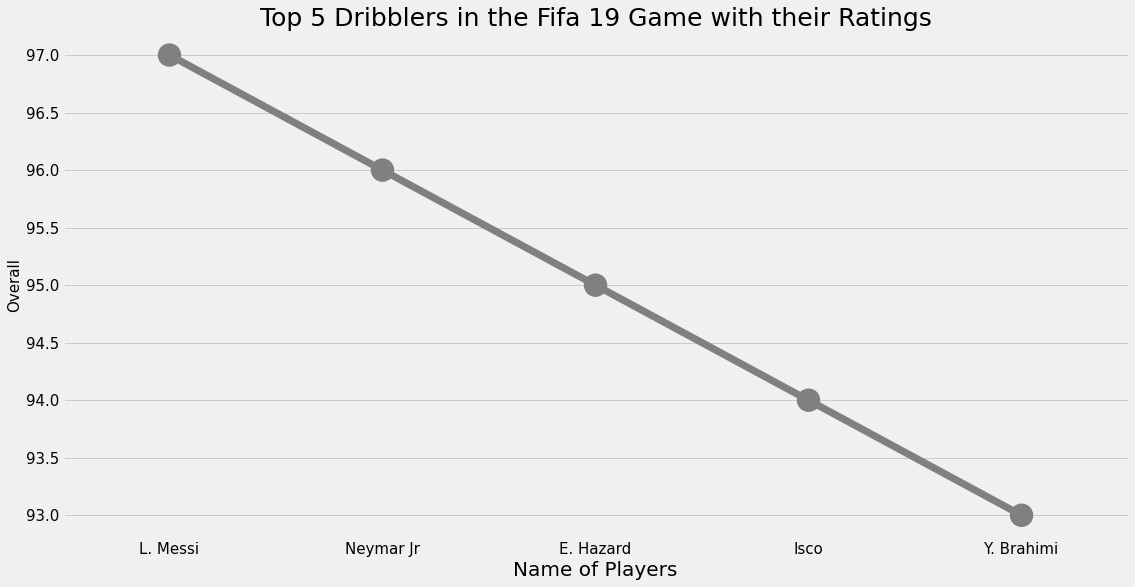

In [186]:
df_fka = data.sort_values(by='Dribbling', ascending=False).head(5)
sns.catplot('Name', 'Dribbling', data = df_fka, kind = 'point', height = 8, aspect = 2, color='grey')
plt.xlabel('Name of Players', size = 20)
plt.yticks(size=15)
plt.title('Top 5 Dribblers in the Fifa 19 Game with their Ratings', size=25)
plt.ylabel('Overall', size=15)
plt.xticks(size=15)

Again, Messi tops in Dribbling with 97 points which is not a suprise while Neymar Jr comes second with 96 point.

### Players Postions and their Preference

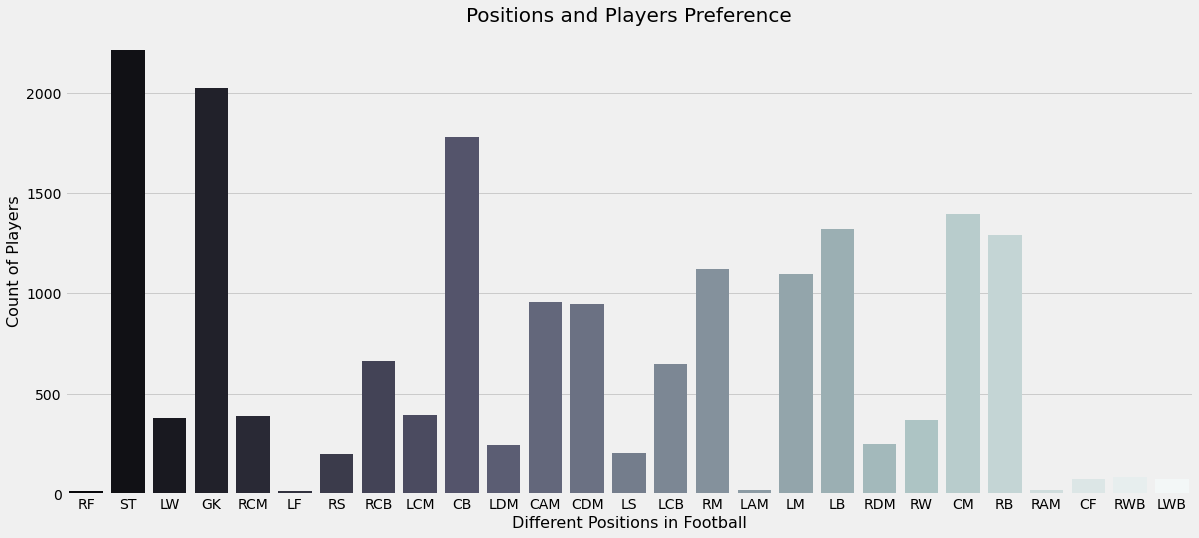

In [37]:
plt.figure(figsize = (18, 8))
plt.style.use('fivethirtyeight')
ax = sns.countplot('Position', data = data, palette = 'bone')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Positions and Players Preference', fontsize = 20)
plt.show()

We can see that players choose the Striking postions while less players choose the LF position

### Preferred Foot among Players

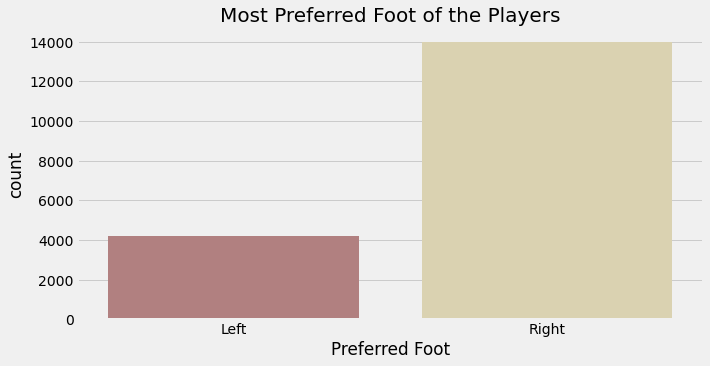

In [38]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(data['Preferred Foot'], palette = 'pink')
plt.title('Most Preferred Foot of the Players', fontsize = 20)
plt.show()

### The International Reputation of Football Players in Fifa 19

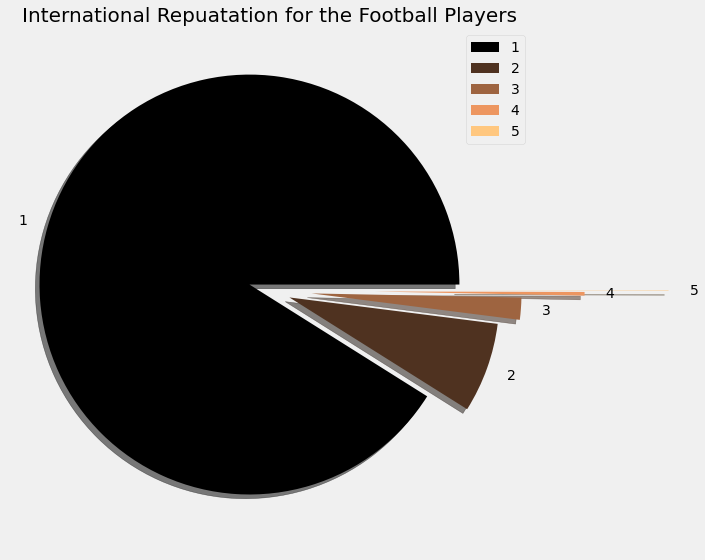

In [188]:
labels = ['1', '2', '3', '4', '5']
sizes = data['International Reputation'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0.1, 0.1, 0.2, 0.5, 0.9]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title('International Repuatation for the Football Players', fontsize = 20)
plt.legend()
plt.show()

### The Distribution of Weak Foot among Players

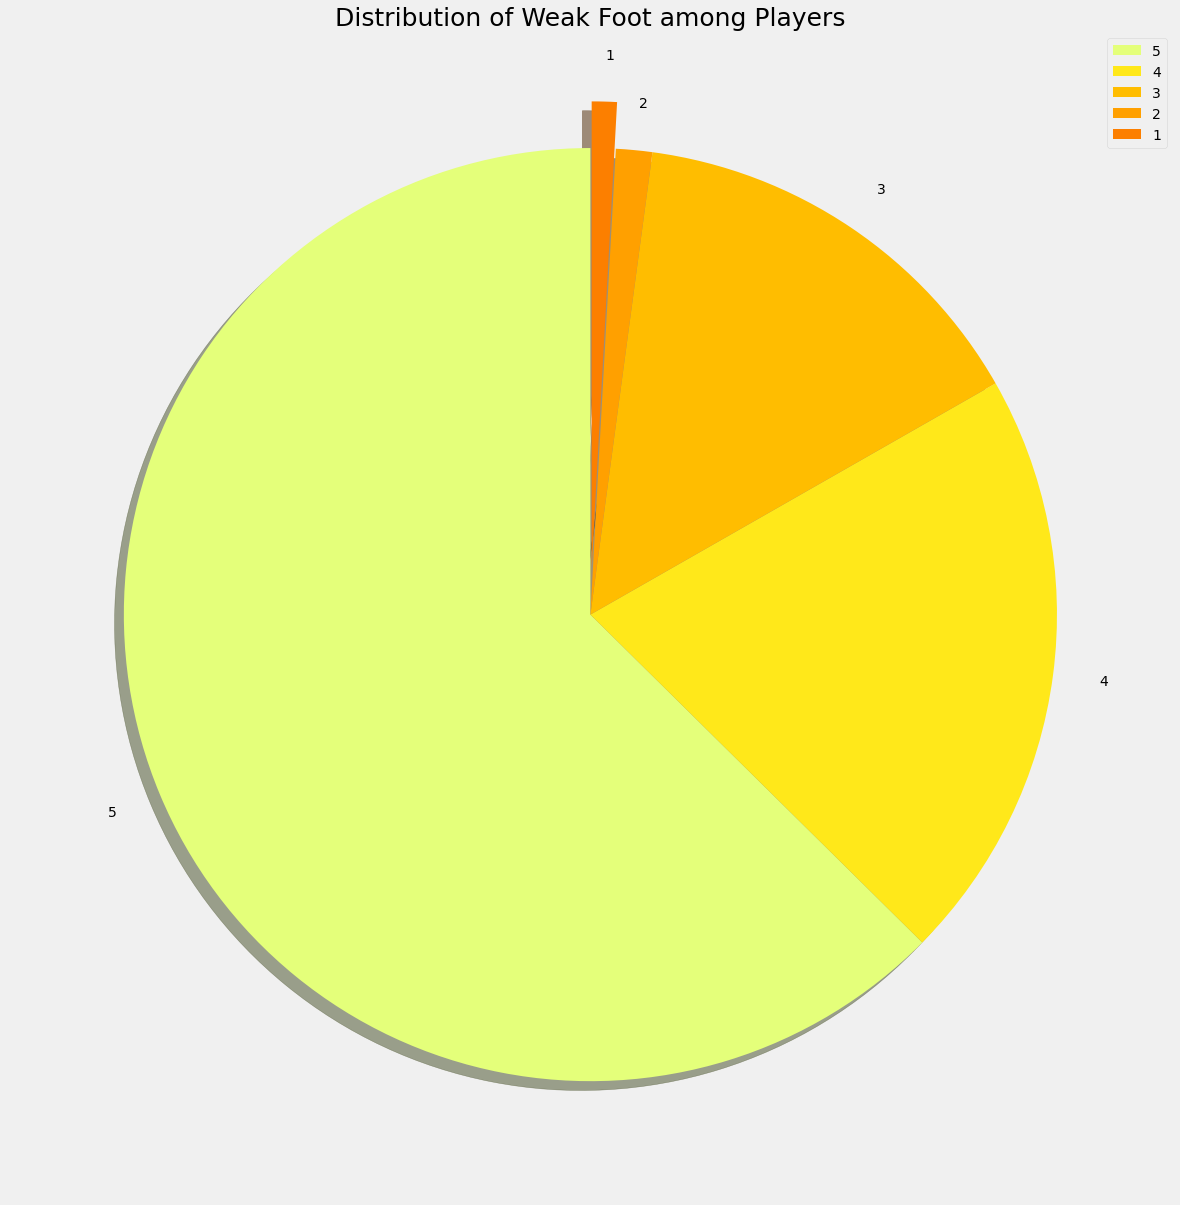

In [187]:
labels = ['5', '4', '3', '2', '1'] 
size = data['Weak Foot'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0, 0, 0, 0.1]

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Weak Foot among Players', fontsize = 25)
plt.legend()
plt.show()

### The Distribution of Skill Moves among Players

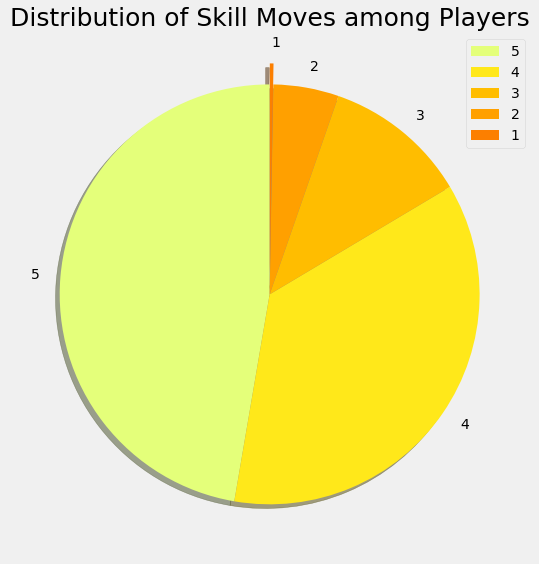

In [189]:
labels = ['5', '4', '3', '2', '1'] 
size = data['Skill Moves'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0, 0, 0, 0.1]

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Skill Moves among Players', fontsize = 25)
plt.legend()
plt.show()

### The Distribution of Work Rates among Players

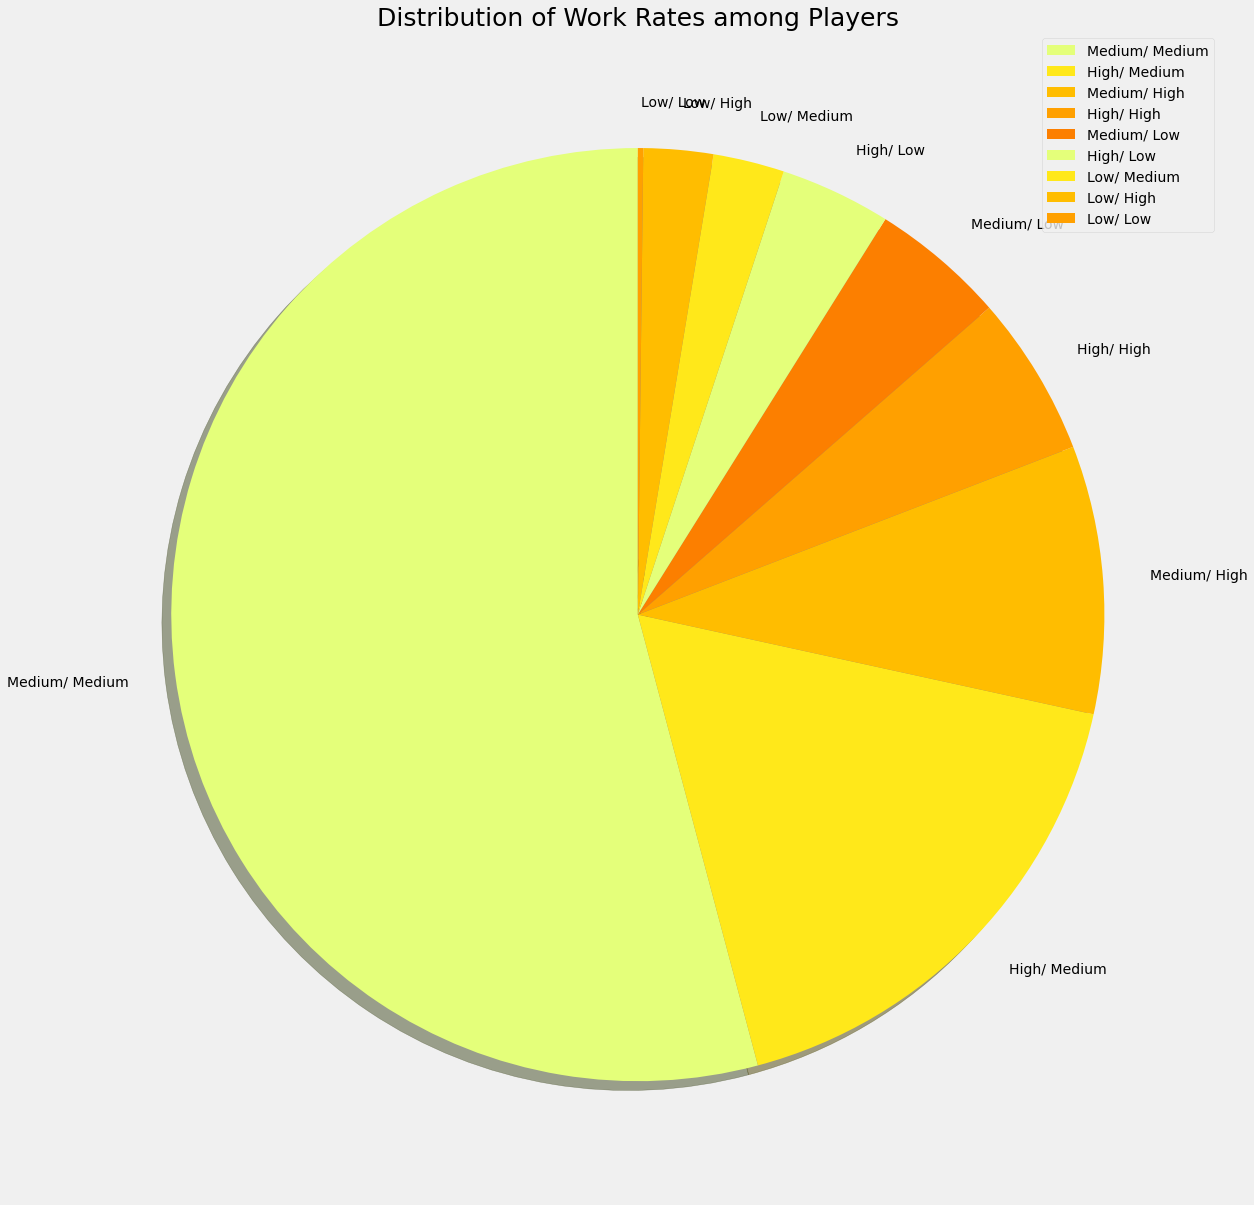

In [147]:
labels = ['Medium/ Medium', 'High/ Medium', 'Medium/ High', 'High/ High', 'Medium/ Low', 'High/ Low', 'Low/ Medium', 'Low/ High', 'Low/ Low '] 
size = data['Work Rate'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))

plt.pie(size, labels = labels, colors = colors, shadow = True, startangle = 90)
plt.title('Distribution of Work Rates among Players', fontsize = 25)
plt.legend()
plt.show()

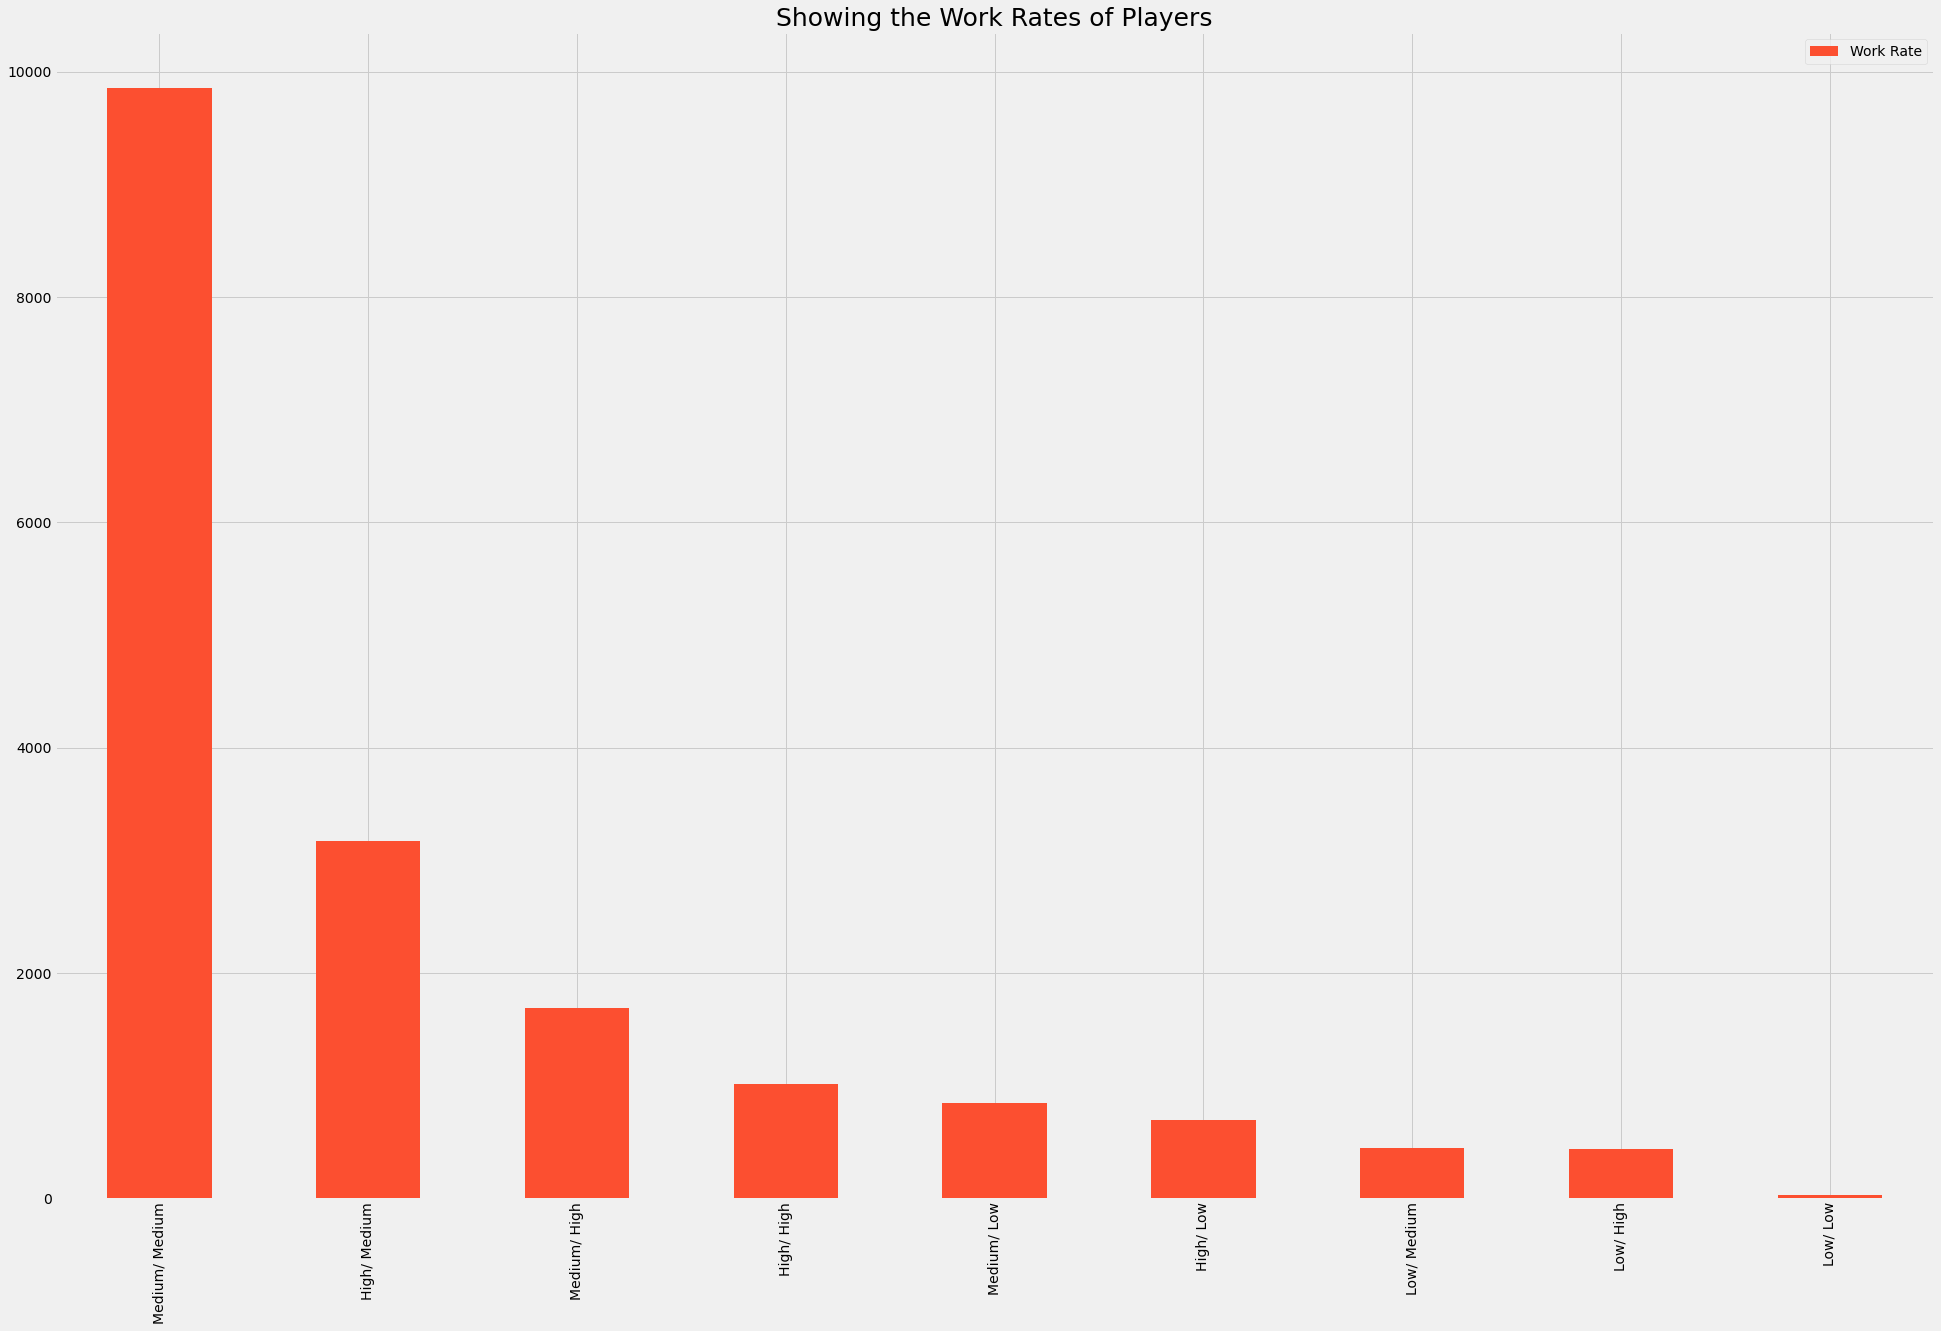

In [150]:
data['Work Rate'].value_counts().plot(kind='bar', color='C1')
plt.title('Showing the Work Rates of Players', fontsize = 25)
plt.legend()
plt.show()

### The Distribution of Wages among Players

In [42]:
def extract_value_from(value):
    out = value.replace('lbs', '')
    return float(out)

In [43]:
data['Weight'] = data['Weight'].apply(lambda x : extract_value_from(x))
data['Weight'].head()

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

In [44]:
def extract_value_from(Value):
    out = Value.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in Value:
        out = float(out.replace('K', ''))*1000
    return float(out)

In [45]:
data['Value'] = data['Value'].apply(lambda x: extract_value_from(x))
data['Wage'] = data['Wage'].apply(lambda x: extract_value_from(x))

data['Wage'].head()

0    565000.0
1    405000.0
2    290000.0
3    260000.0
4    355000.0
Name: Wage, dtype: float64

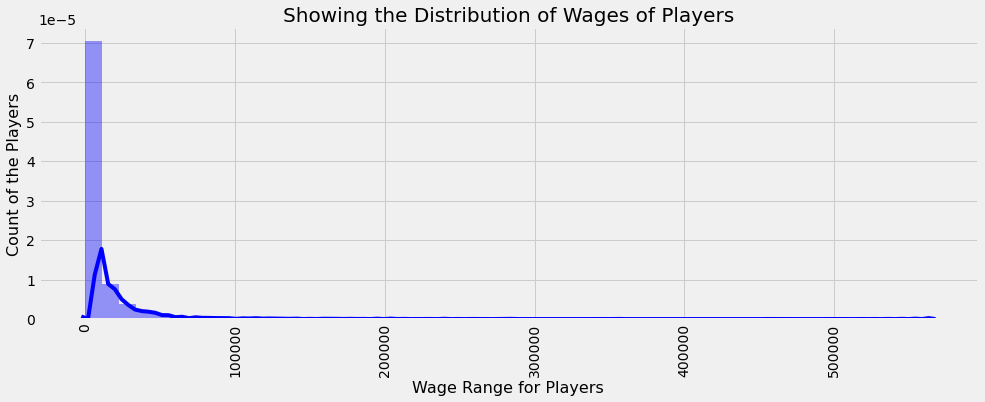

In [46]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(data['Wage'], color = 'blue')
plt.xlabel('Wage Range for Players', fontsize = 16)
plt.ylabel('Count of the Players', fontsize = 16)
plt.title('Showing the Distribution of Wages of Players', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

### Showing the Squad value 

Text(11.120000000000012, 0.5, 'Squad Value (€M)')

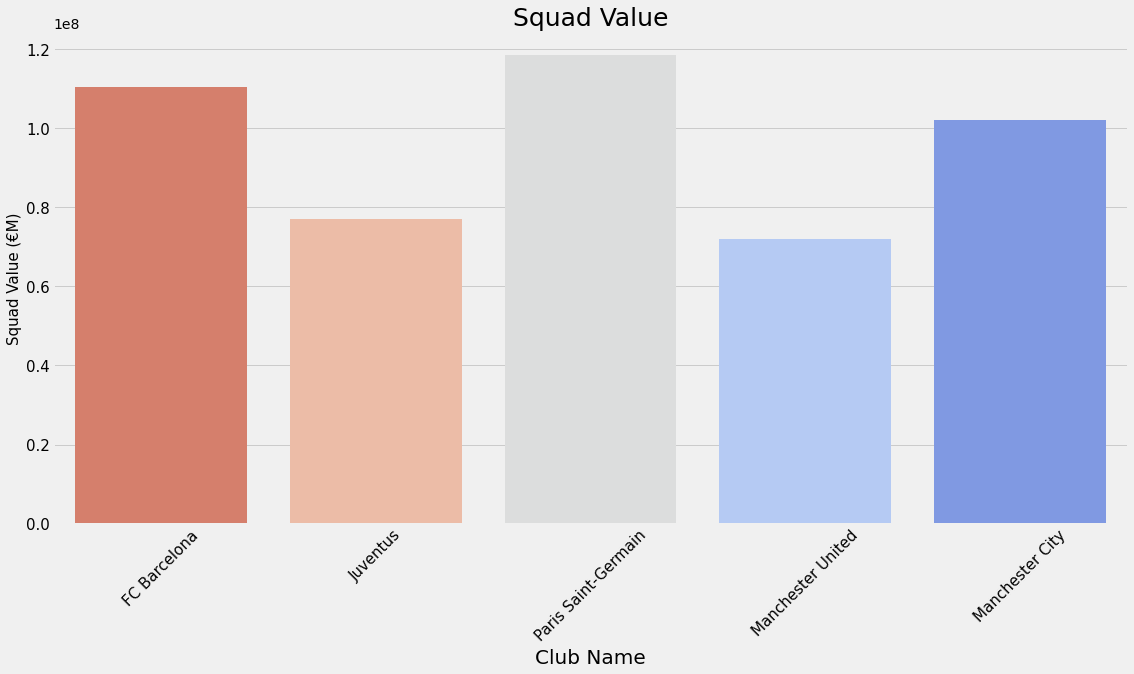

In [85]:
sns.catplot('Club', 'Value', data = data.head(5), kind = 'bar', height = 8, aspect = 2, palette = 'coolwarm_r')
plt.xticks(size=15, rotation=45)
plt.xlabel('Club Name', size = 20)
plt.yticks(size=15)
plt.title('Squad Value', size=25)
plt.ylabel('Squad Value (€M)', size=15)

In [47]:
selected_columns = ['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
                    'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
                    'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Height', 'Weight',
                    'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                    'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
                    'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
                    'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                    'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
                    'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                    'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']

data_selected = pd.DataFrame(data, columns = selected_columns)
data_selected.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Height', 'Weight', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')

In [48]:
data_selected.sample(5)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
6063,C. Chávez,31,Argentina,69,69,Club Atlético Aldosivi,925000.0,7000.0,1704,Right,...,67.0,24.0,32.0,24.0,9.0,14.0,11.0,12.0,13.0,€1.3M
16675,M. Galé,22,Colombia,56,64,La Equidad,110000.0,1000.0,1458,Left,...,38.0,52.0,49.0,56.0,6.0,14.0,12.0,11.0,6.0,€171K
7978,H. Sacko,24,Mali,67,71,UD Las Palmas,1000000.0,12000.0,1663,Right,...,49.0,24.0,25.0,19.0,8.0,8.0,6.0,15.0,10.0,0
12907,T. Baumgart,20,Germany,63,73,FC Erzgebirge Aue,600000.0,1000.0,1591,Right,...,47.0,39.0,26.0,27.0,14.0,12.0,7.0,7.0,13.0,€1.1M
7973,J. Kubicki,22,Poland,67,73,Lechia Gdańsk,1000000.0,3000.0,1809,Right,...,71.0,58.0,68.0,63.0,9.0,15.0,6.0,13.0,10.0,€1.6M


In [49]:
player_features = ('Acceleration', 'Aggression', 'Agility', 
                   'Balance', 'BallControl', 'Composure', 
                   'Crossing', 'Dribbling', 'FKAccuracy', 
                   'Finishing', 'GKDiving', 'GKHandling', 
                   'GKKicking', 'GKPositioning', 'GKReflexes', 
                   'HeadingAccuracy', 'Interceptions', 'Jumping', 
                   'LongPassing', 'LongShots', 'Marking', 'Penalties')


### The Distribution of Players Position

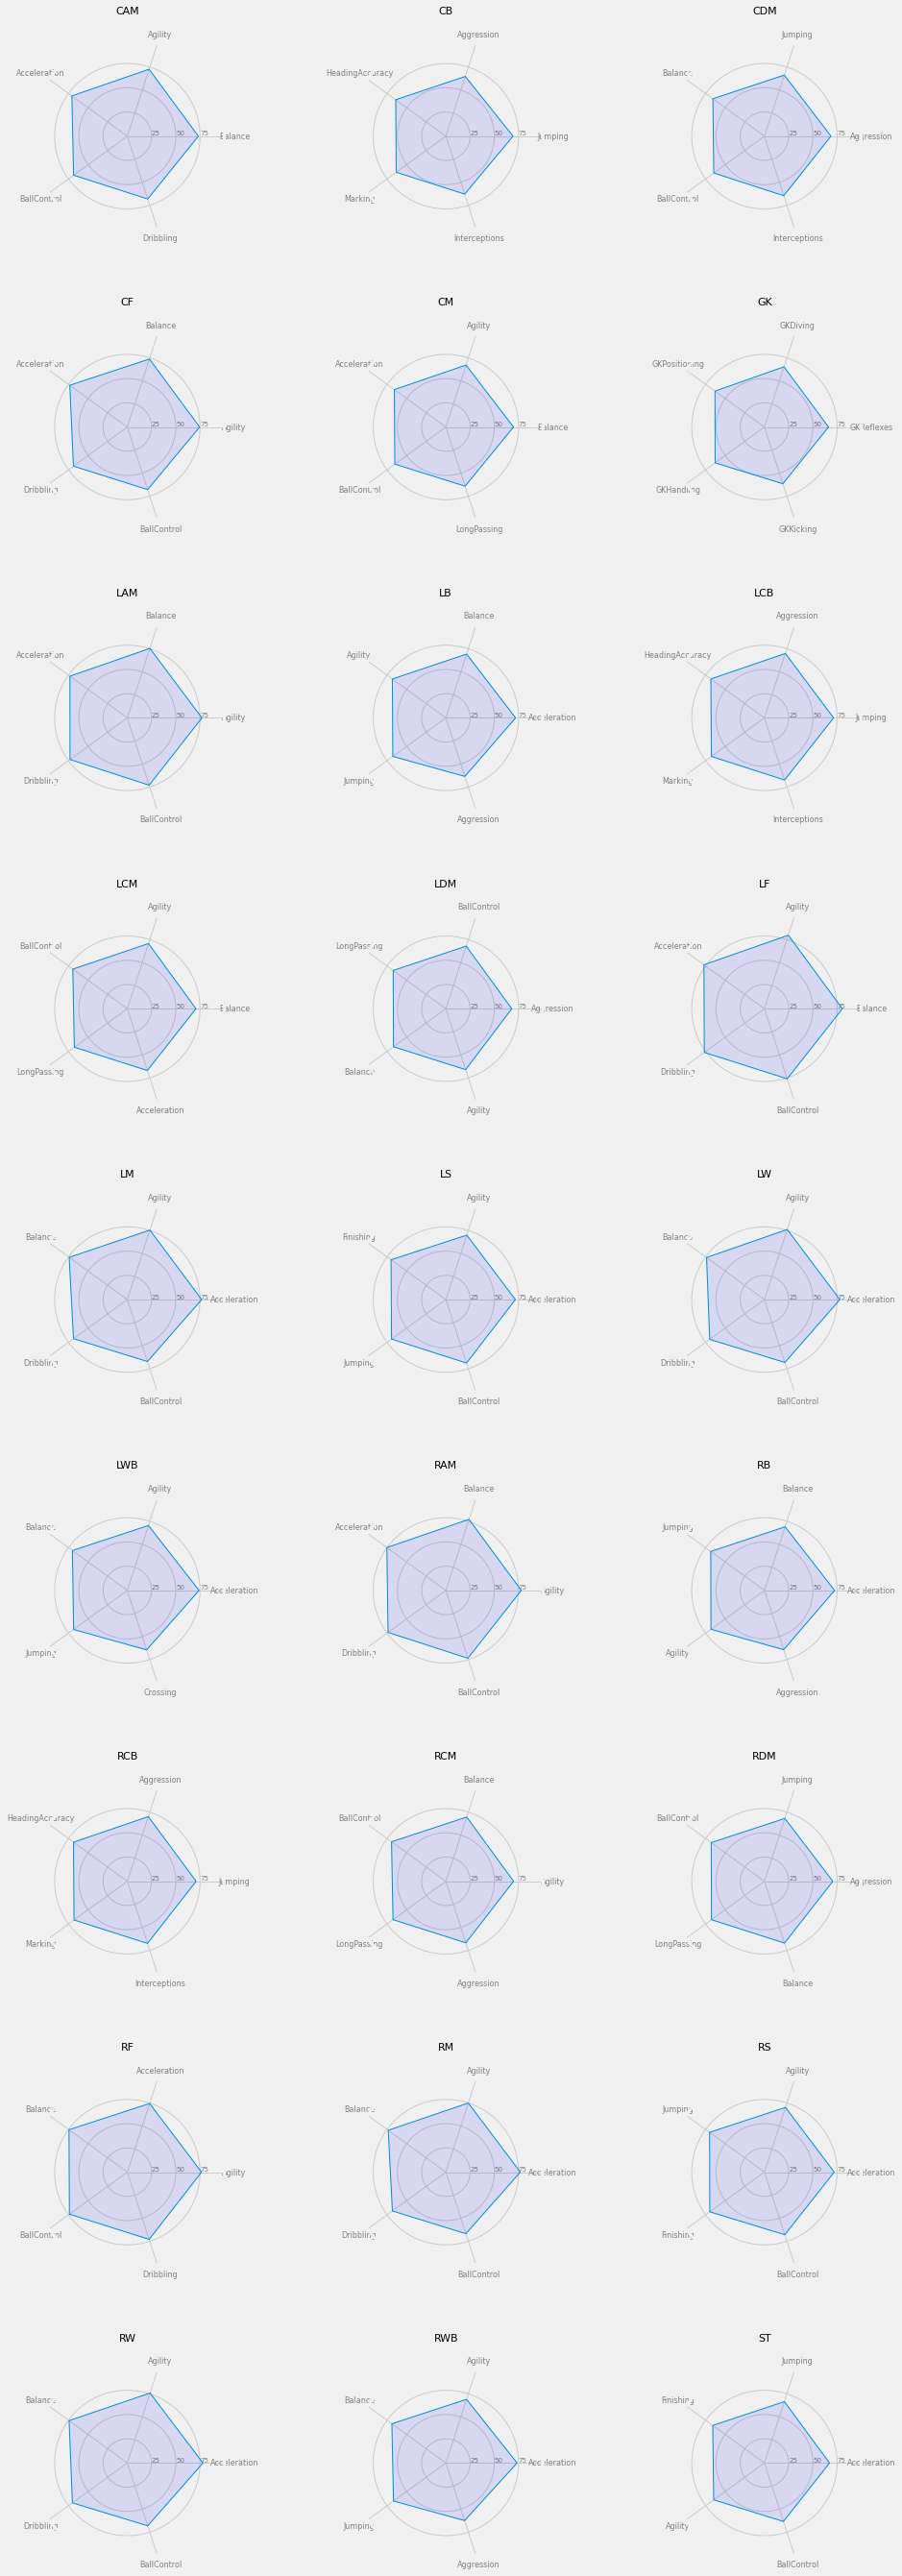

In [50]:
from math import pi

idx = 1
plt.figure(figsize=(15,45))
for position_name, features in data.groupby(data['Position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))

    # number of variable
    categories=top_features.keys()
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(9, 3, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)

    plt.subplots_adjust(hspace = 0.5)

    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

    plt.title(position_name, size=11, y=1.1)

    idx += 1


### Creating a Simple Football Pitch

In [169]:
def draw_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = Rectangle([0,0], width = 120, height = 80, fill = False)
    #Left, Right Penalty Area and midline
    LeftPenalty = Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False)
    RightPenalty = Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)
    midline = ConnectionPatch([60,0], [60,80], "data", "data")

    #Left, Right 6-yard Box
    LeftSixYard = Rectangle([0,32], width = 4.9, height = 16, fill = False)
    RightSixYard = Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")

    element = [Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)

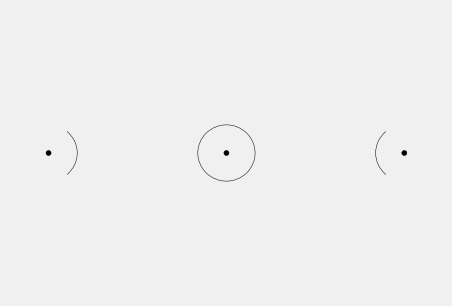

In [170]:
fig=plt.figure() #set up the figures
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('off')
plt.show()

## The Best Players of Each Player Positions

In [99]:
# Best Players of EACH Position
df_post = data.iloc[data.groupby(data['Position'])['Overall'].idxmax()]
df_post.sort_values(by='Overall', ascending=False).reset_index(drop=True)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,GKReflexes,Release Clause,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
0,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,11.0,€127.1M,27,88,73,81,91,83,94,88
1,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,8.0,€226.5M,29,89,71,87,91,74,94,88
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,11.0,€228.1M,28,85,72,80,94,69,92,84
3,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,8.0,€172.1M,28,83,72,84,92,75,91,82
4,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,37.0,€164M,48,85,78,74,84,81,91,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,56,218667,Bernardo Silva,23,https://cdn.sofifa.org/players/4/19/218667.png,Portugal,https://cdn.sofifa.org/flags/38.png,86,91,Manchester City,...,9.0,€114.5M,43,79,72,83,82,66,88,70
23,129,193082,J. Cuadrado,30,https://cdn.sofifa.org/players/4/19/193082.png,Colombia,https://cdn.sofifa.org/flags/56.png,84,84,Juventus,...,9.0,€48.7M,69,78,75,76,88,74,84,72
24,271,198706,Luis Alberto,25,https://cdn.sofifa.org/players/4/19/198706.png,Spain,https://cdn.sofifa.org/flags/45.png,82,85,Lazio,...,11.0,€50.6M,29,77,59,84,78,67,84,74
25,474,200536,N. Schulz,25,https://cdn.sofifa.org/players/4/19/200536.png,Germany,https://cdn.sofifa.org/flags/21.png,80,81,TSG 1899 Hoffenheim,...,14.0,€25.7M,76,68,72,77,82,72,80,50


In [103]:
df_top_player = df_post.loc[:,['Name', 'Overall', 'Position']]
df_top_player.head(20)

,Name,Overall,Position
17,A. Griezmann,89,CAM
12,D. Godín,90,CB
20,Sergio Busquets,89,CDM
271,Luis Alberto,82,CF
67,Thiago,86,CM
3,De Gea,91,GK
28,J. Rodríguez,88,LAM
35,Marcelo,88,LB
24,G. Chiellini,89,LCB
11,T. Kroos,90,LCM


## Creating a Correlation Plot for the Data

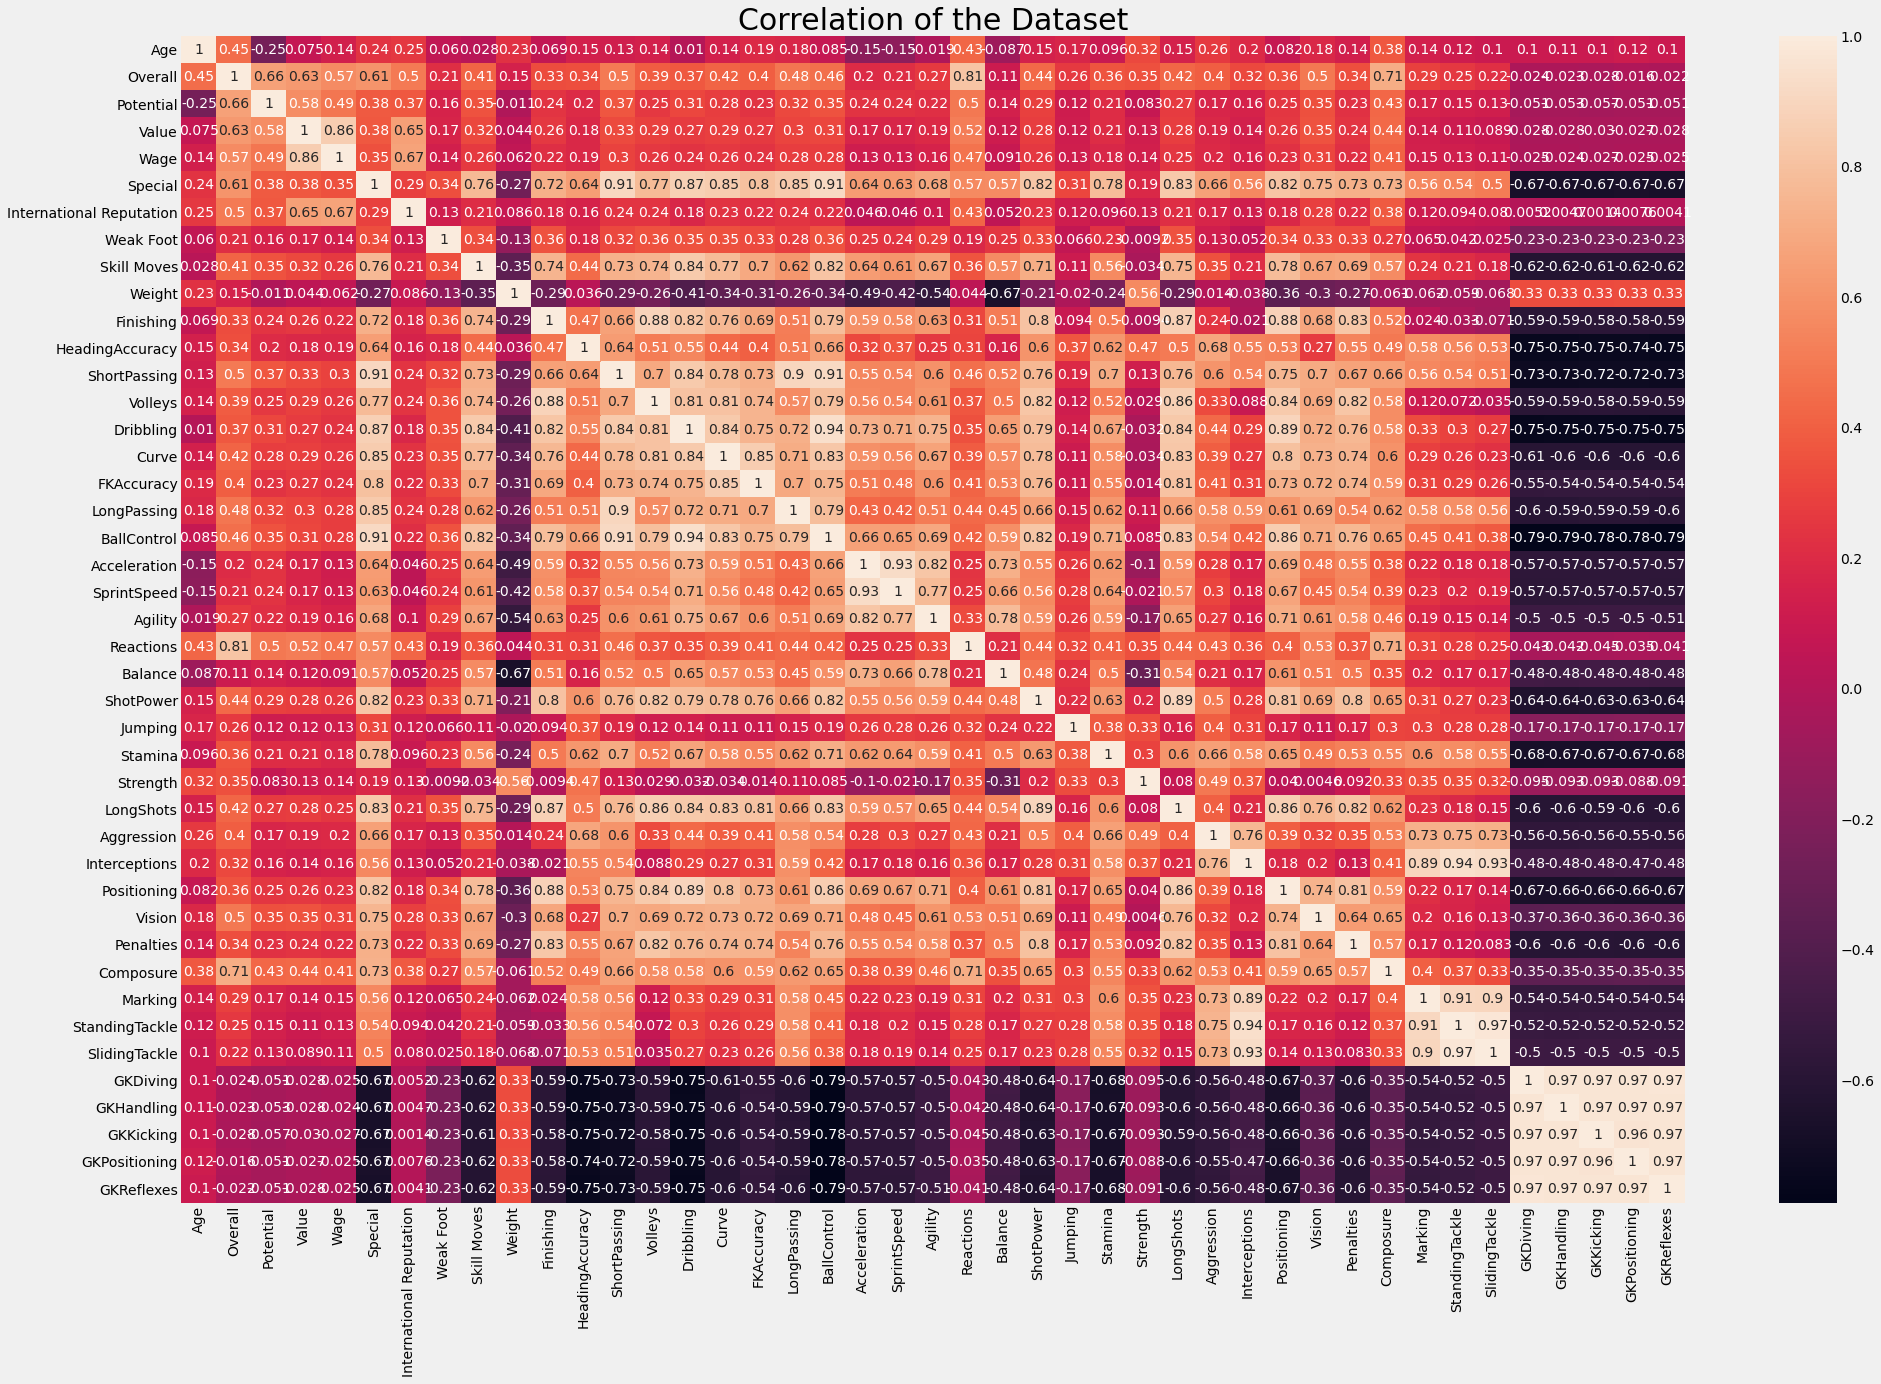

In [191]:
plt.rcParams['figure.figsize'] = (30, 20)
sns.heatmap(data_selected[['Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
                    'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
                    'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Height', 'Weight',
                    'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                    'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
                    'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
                    'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                    'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
                    'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                    'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']].corr(), annot = True)

plt.title('Correlation of the Dataset', fontsize = 30)
plt.show()

<h1 style="font-size:2em;color:#2467C0">Predicting: 'overall_rating' of a player</h1>

### Create a list of potential Features that you want to measure correlation with

In [52]:
for f in player_features:
    related = data['Overall'].corr(data[f])
    print("%s: %f" % (f,related))

Acceleration: 0.198927
Aggression: 0.395130
Agility: 0.265392
Balance: 0.107572
BallControl: 0.459968
Composure: 0.711350
Crossing: 0.394776
Dribbling: 0.372241
FKAccuracy: 0.397528
Finishing: 0.332349
GKDiving: -0.024374
GKHandling: -0.023450
GKKicking: -0.027729
GKPositioning: -0.016088
GKReflexes: -0.021732
HeadingAccuracy: 0.340606
Interceptions: 0.322663
Jumping: 0.262914
LongPassing: 0.483668
LongShots: 0.421238
Marking: 0.288075
Penalties: 0.341984


## Which features have the highest correlation with overall_rating?

Looking at the values printed by the previous cell, we notice that the to two are "composure" (0.71) and "ball control" (0.45). So these two features seem to have higher correlation with "overall_rating".

In [53]:
features = [
    'Potential', 'Acceleration', 'Aggression', 'Agility', 
    'Balance', 'BallControl', 'Composure', 
    'Crossing', 'Dribbling', 'FKAccuracy', 
    'Finishing', 'GKDiving', 'GKHandling', 
    'GKKicking', 'GKPositioning', 'GKReflexes', 
    'HeadingAccuracy', 'Interceptions', 'Jumping', 
    'LongPassing', 'LongShots', 'Marking', 'Penalties']


<h1 style="font-size:2em;color:#2467C0">Clustering Players into Similar Groups</h1>

## Select Features on Which to Group Players

In [54]:
selecting_features = ['Composure', 'BallControl', 'Potential', 'Interceptions', 'Acceleration']

In [55]:
# Generate a new dataframe by selecting the features you just defined
df_selected = data[selecting_features].copy(deep=True)

In [56]:
df_selected.head()

,Composure,BallControl,Potential,Interceptions,Acceleration
0,96.0,96.0,94,22.0,91.0
1,95.0,94.0,94,29.0,89.0
2,94.0,95.0,93,36.0,94.0
3,68.0,42.0,93,30.0,57.0
4,88.0,91.0,92,61.0,78.0


## Perform KMeans Clustering

Now we will use a machine learning method called KMeans to cluster the values (i.e., player features on composure, ballcontrol, potential, interceptions and acceleration). We will ask for four clusters

In [57]:
km = KMeans(n_clusters = 5)

In [58]:
clusters = km.fit_predict(df_selected)

In [59]:
km.labels_

array([4, 4, 4, ..., 0, 0, 3])

In [60]:
clusters

array([4, 4, 4, ..., 0, 0, 3])

In [61]:
clusters in km.labels_

True

In [62]:
km.cluster_centers_

array([[54.79424135, 61.17081851, 69.72015529, 22.58007117, 69.79715302],
       [43.91075736, 20.85370671, 69.57067053, 16.67631452, 37.26386879],
       [67.15498779, 68.39770806, 74.05861356, 67.62333271, 67.99849709],
       [52.36570719, 53.75398633, 68.108304  , 57.62580244, 61.07289294],
       [67.1940505 , 71.52023521, 74.52715323, 36.45624351, 77.29470771]])

In [63]:
df_selected['Clusters'] = clusters

In [64]:
df_selected.head()

,Composure,BallControl,Potential,Interceptions,Acceleration,Clusters
0,96.0,96.0,94,22.0,91.0,4
1,95.0,94.0,94,29.0,89.0,4
2,94.0,95.0,93,36.0,94.0,4
3,68.0,42.0,93,30.0,57.0,0
4,88.0,91.0,92,61.0,78.0,2


In [206]:
def pd_centers(featuresUsed, centers):
    from itertools import cycle, islice
    from pandas.plotting import parallel_coordinates
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np

def parallel_plot(data):
    from itertools import cycle, islice
    from pandas.plotting import parallel_coordinates
    import matplotlib.pyplot as plt
    
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None))
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-2.5,+2.5])
    parallel_coordinates(data, 'Clusters', color = my_colors, marker='o')

In [198]:
# Create a composite dataframe for plotting
# ... Use custom function declared in customplot.py (which we imported at the beginning of this notebook)

Plot = pd_centers(featuresUsed=df_selected, centers=km.cluster_centers_)
Plot

<h1 style="font-size:2em;color:#2467C0">Visualization of Clusters</h1>
We now have 4 clusters based on the features we selected, we can treat them as profiles for similar groups of players. 

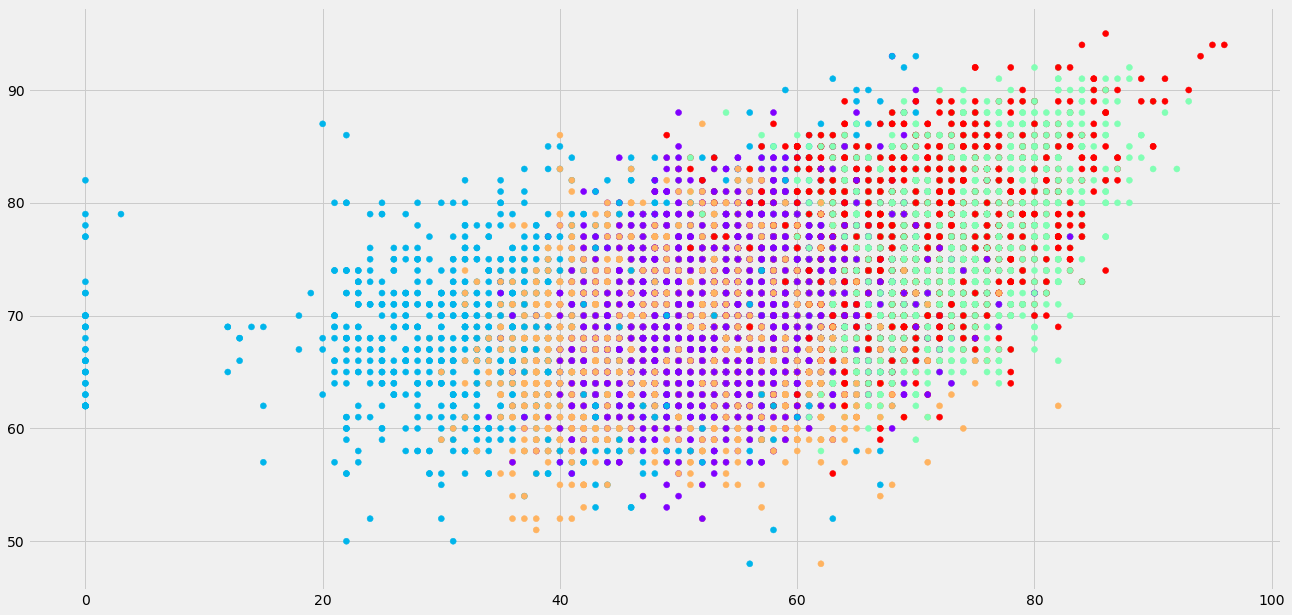

In [65]:
plt.figure(figsize=(20,10))
plt.scatter(df_selected['Composure'], df_selected['Potential'],c=df_selected['Clusters'], cmap= 'rainbow')

## Using Regression

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Specify the Prediction Target
<br><br></p>


In [66]:
target = ['Overall']

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Extract Features and Target ('overall_rating') Values into Separate Dataframes
<br><br></p>


In [67]:
X = data[features]

In [68]:
y = data[target]

In [69]:
X.iloc[2]

Potential       93.0
Acceleration    94.0
Aggression      56.0
Agility         96.0
Balance         84.0
                ... 
Jumping         61.0
LongPassing     78.0
LongShots       82.0
Marking         27.0
Penalties       81.0
Name: 2, Length: 23, dtype: float64

In [70]:
y

,Overall
0,94
1,94
2,92
3,91
4,91
...,...
18202,47
18203,47
18204,47
18205,47


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Split the Dataset into Training and Test Datasets
<br><br></p>


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Linear Regression: Fit a model to the training set
<br><br></p>


In [72]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Perform Prediction using Linear Regression Model
<br><br></p>


In [73]:
y_prediction = regressor.predict(X_test)
y_prediction

array([[63.34791888],
       [68.21140778],
       [83.13126552],
       ...,
       [66.93356755],
       [72.06843871],
       [66.48569682]])

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

What is the mean of the expected target value in test set ?
<br><br></p>


In [74]:
y_test.describe()

,Overall
count,6009.000000
mean,66.210850
std,6.919211
min,47.000000
25%,62.000000
50%,66.000000
75%,71.000000
max,91.000000


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Evaluate Linear Regression Accuracy using Root Mean Square Error

<br><br></p>


In [75]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [76]:
print(RMSE)

2.8288743647223895


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Decision Tree Regressor: Fit a new regression model to the training set
<br><br></p>


In [77]:
regressor = DecisionTreeRegressor(max_depth=20)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=20,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Perform Prediction using Decision Tree Regressor
<br><br></p>


In [78]:
y_prediction = regressor.predict(X_test)
y_prediction

array([64., 69., 88., ..., 64., 72., 63.])

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

For comparision: What is the mean of the expected target value in test set ?
<br><br></p>


In [79]:
y_test.describe()

,Overall
count,6009.000000
mean,66.210850
std,6.919211
min,47.000000
25%,62.000000
50%,66.000000
75%,71.000000
max,91.000000


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Evaluate Decision Tree Regression Accuracy using Root Mean Square Error

<br><br></p>


In [80]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [81]:
print(RMSE)

2.3312952879116864
